 # Perkenalan
 1. Nama : Cindra Chatami
 2. Batch : 9 FTDS


 
The company's success, progress, and performance is actualy related with their employee. The happier the employee, then they might give their best for the company. To simplify, if the company took care of their employee, then the employee will take care of their company. Those poor mental health could affect company in negative ways, that's what [cdc](https://www.cdc.gov/workplacehealthpromotion/tools-resources/workplace-health/mental-health/index.html#:~:text=Poor%20mental%20health%20and%20stress,Job%20performance%20and%20productivity.) says. Therefore, **I'm paying attention to mental-health-issue**. Since it's related to mental-health, one of the parameter we can use to understand the mental condition of our employee is to understand `do they ever do treatment? because if they do, then they might have issue with their mental health`. Those, need to be taken care of. 

My objective here is to inform the employer about the condition of their employee and how to provide them with help in hoping improving their work. This project too will analyze the relationship between their statemetn of treatment and the parameters exists (the feature in this datasets)


This datasets were collected from Kaggle [Mental Health](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey). This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. All columns were based on questionare and further will be analyze. My main goal here is to predict customer's needs of Treatment based on their mental health condition. This notebook is about `Classification` cases. Therefore I'm going to use Algorithm for Classification Purposes.

# Library Import

In [1]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

# model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#evaluation
from sklearn.metrics import *

# Loading Data

In [2]:
df = pd.read_csv('survey.csv')

In [3]:
pd.set_option("display.max_columns", None)
df.columns = df.columns.str.lower()
df

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


About The Data 

**Timestamp**

**Age**

**Gender**

**Country**

**state**: If you live in the United States, which state or territory do you live in?

**self_employed**: Are you self-employed?

**family_history**: Do you have a family history of mental illness?

**treatment**: Have you sought treatment for a mental health condition?

**work_interfere**: If you have a mental health condition, do you feel that it interferes with your work?

**no_employees**: How many employees does your company or organization have?

**remote_work**: Do you work remotely (outside of an office) at least 50% of the time?

**tech_company**: Is your employer primarily a tech company/organization?

**benefits**: Does your employer provide mental health benefits?

**care_options**: Do you know the options for mental health care your employer provides?

**wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?

**seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help?

**anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

**leave**: How easy is it for you to take medical leave for a mental health condition?

**mentalhealthconsequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?

**physhealthconsequence**: Do you think that discussing a physical health issue with your employer would have negative consequences?

**coworkers**: Would you be willing to discuss a mental health issue with your coworkers?

**supervisor**: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

**mentalhealthinterview**: Would you bring up a mental health issue with a potential employer in an interview?

**physhealthinterview**: Would you bring up a physical health issue with a potential employer in an interview?

*mentalvsphysical**: Do you feel that your employer takes mental health as seriously as physical health?

**obs_consequence**: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

**comments**: Any additional notes or comments

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  1259 non-null   object
 1   age                        1259 non-null   int64 
 2   gender                     1259 non-null   object
 3   country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

> - This data have 1.259 entries
> - 27 columns and all are objects.
> - some have missing value
> - comments are optional, I'll exclude this as my feature
> - State columns are dependent to US, I'll drop this column

<AxesSubplot:ylabel='treatment'>

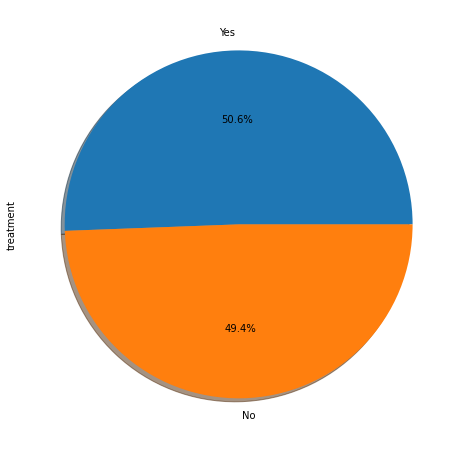

In [5]:
targets = df.treatment.value_counts()
targets.plot.pie(autopct='%1.1f%%', shadow=True, figsize=(8,8))

> 50% of data needs treatments, this data is balance enough

# EDA

## Changing format
The target (treatment) needs to be in binary to analyze in EDA part

In [6]:
df['treatment'] = (df['treatment'] == 'Yes').astype(int)

## Cardinality
Cardinality will be checked based on categorical columns

In [7]:
cardinal = df.select_dtypes(include='object')
for uniq in cardinal : 
  print(f'jumlah cardinality pada kolom {uniq} : ',len(cardinal[uniq].unique()))

jumlah cardinality pada kolom timestamp :  1246
jumlah cardinality pada kolom gender :  49
jumlah cardinality pada kolom country :  48
jumlah cardinality pada kolom state :  46
jumlah cardinality pada kolom self_employed :  3
jumlah cardinality pada kolom family_history :  2
jumlah cardinality pada kolom work_interfere :  5
jumlah cardinality pada kolom no_employees :  6
jumlah cardinality pada kolom remote_work :  2
jumlah cardinality pada kolom tech_company :  2
jumlah cardinality pada kolom benefits :  3
jumlah cardinality pada kolom care_options :  3
jumlah cardinality pada kolom wellness_program :  3
jumlah cardinality pada kolom seek_help :  3
jumlah cardinality pada kolom anonymity :  3
jumlah cardinality pada kolom leave :  5
jumlah cardinality pada kolom mental_health_consequence :  3
jumlah cardinality pada kolom phys_health_consequence :  3
jumlah cardinality pada kolom coworkers :  3
jumlah cardinality pada kolom supervisor :  3
jumlah cardinality pada kolom mental_health_i

> Need to reduce cardinality in timestamp, gender, country. However, timestamp is not really useful.

In [8]:
#reduce gender's cardinality
df['gender'].replace(['Male ', 'Mal', 'maile', 'Make',
                       'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr',], 'Male', inplace = True)

df['gender'].replace(['Female ', 'female', 'cis-female/femme', 'Femake', 
                     'femail', 'Cis Female',  'Female (cis)',
                     'woman', 'Female', 'F', 'f', 'Woman'],'Female', inplace = True)

df["gender"].replace(['ostensibly male, unsure what that really means', 'Genderqueer',
                       'fluid', 'Nah', 'Female (trans)', 'non-binary', 'queer/she/they',
                      'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you',  'All',
                       'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

In [9]:
#reduce country cardinality based on their continent
df['country'].replace(['United States','Canada', 'Brazil','Mexico',
                       'Colombia','Uruguay', 'Costa Rica'
                        ], 'America', inplace = True)

df['country'].replace(['United Kingdom', 'Latvia', 'Spain','Hungary','Norway',
                        'Czech Republic', 'Moldova','Portugal',
                        'Denmark', 'Russia','Finland', 'Austria',
                        'Belgium','Italy', 'Sweden','Switzerland',
                        'Poland','France','Netherlands','Germany', 'Ireland'
                        ],'Europe', inplace = True)

df["country"].replace(['India','Israel','Singapore','China', 'Thailand',
                        'Japan', 'Philippines'], 'Asia', inplace = True)

df["country"].replace(['Bulgaria','Greece','Croatia','Romania',
                        'Bosnia and Herzegovina',
                        'Slovenia', 'Philippines'], 'Balkans', inplace = True)

df["country"].replace(['Australia','New Zealand'], 'Oceania', inplace = True)

df["country"].replace(['South Africa','Nigeria', 'Zimbabwe'], 'Africa', inplace = True)

df["country"].replace(['Bahamas, The', 'Georgia'], 'Others', inplace=True)

In [10]:
#reduce age cardinality by grouping them
bins_age= [16,30,45,99]
labels_age = ['16-30','31-45','Above 45']
df['age_'] = pd.cut(df['age'], bins=bins_age, labels=labels_age)

## Missing Value Check

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   timestamp                  1259 non-null   object  
 1   age                        1259 non-null   int64   
 2   gender                     1259 non-null   object  
 3   country                    1259 non-null   object  
 4   state                      744 non-null    object  
 5   self_employed              1241 non-null   object  
 6   family_history             1259 non-null   object  
 7   treatment                  1259 non-null   int32   
 8   work_interfere             995 non-null    object  
 9   no_employees               1259 non-null   object  
 10  remote_work                1259 non-null   object  
 11  tech_company               1259 non-null   object  
 12  benefits                   1259 non-null   object  
 13  care_options               1259 n

> Column work_interefere and self_employed have missing value

In [12]:
df.age.unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

> There are weird value in age column since it's impossible for people to have 9999 , negative, or extreme minimum age for work. This needs to be analyzed further

In [13]:
#define weird value
weird_age = df[(df['age'] < 18) | (df['age'] > 100)]
len(weird_age)/len(df)

0.006354249404289118

> There are only 8 value (0.006% data) we can drop this weird values later

In [14]:
#check missing value in work_interfere column
missing_work_interfere = df.loc[df['work_interfere'].isnull()]
missing_work_interfere

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_
19,2014-08-27 11:35:08,36,Male,Europe,NaN,Yes,Yes,0,NaN,6-25,Yes,Yes,No,No,Yes,No,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,NaN,31-45
26,2014-08-27 11:37:23,33,Male,America,TN,No,No,0,NaN,1-5,No,Yes,Don't know,Not sure,No,Don't know,Don't know,Don't know,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN,31-45
37,2014-08-27 11:41:50,38,Male,Europe,NaN,No,No,0,NaN,100-500,No,Yes,No,Yes,No,No,Don't know,Somewhat easy,Maybe,No,Some of them,Some of them,No,Maybe,No,No,NaN,31-45
38,2014-08-27 11:42:08,50,Male,America,IN,No,No,0,NaN,100-500,No,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,NaN,Above 45
41,2014-08-27 11:42:31,35,Male,America,MI,No,No,0,NaN,More than 1000,Yes,Yes,Yes,Not sure,Don't know,Yes,Don't know,Somewhat difficult,Yes,Yes,Some of them,No,No,Maybe,Don't know,No,NaN,31-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,2015-02-21 17:19:18,39,Male,Europe,NaN,No,No,0,NaN,More than 1000,No,No,Yes,Not sure,Yes,Don't know,Don't know,Somewhat easy,Maybe,Maybe,No,Some of them,No,No,Yes,No,NaN,31-45
1229,2015-02-22 02:40:32,39,Male,Balkans,NaN,No,No,0,NaN,6-25,Yes,Yes,No,No,No,No,Yes,Don't know,Yes,No,No,No,No,No,Don't know,No,NaN,31-45
1244,2015-05-05 15:16:25,32,Female,Europe,NaN,No,No,0,NaN,More than 1000,No,No,No,No,No,Don't know,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Yes,No,No,NaN,31-45
1254,2015-09-12 11:17:21,26,Male,Europe,NaN,No,No,1,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN,16-30


In [15]:
len(missing_work_interfere)/len(df)

0.2096902303415409

> 2% of Missing value at work_interfere features completely at random since there's no pattern why they don't fill the form (MCAR). I'll fill it with it's mode

## Category's Analysis

In this sub, I want to see how's the features (category) correlation with those employee who have done treatments. Since the columns all are category, we can't use correlation from pandas `directly` since it only works for numerical only. I want to calculate the average of worker who have sought treatment based the categories to give an order of it's `ordinality` and count the correlation score towards target. If the correlation score results high, then I'll select it as my feature.

Please note that the graph shown below are graph that shows onlyemployee **who did treatment** before

In [16]:
from matplotlib import cm

In [17]:
def correlation_plot (cat1) :
  cmap = cm.get_cmap('Pastel2')
  df.groupby(cat1).mean()['treatment'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5), colormap = cmap)
  # # _df.groupby(cat2).sum()['treatment'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
  plt.xlabel(cat1)
  plt.ylabel('Average of Worker Who needs Treatment')
  plt.title(f'Correlation between {cat1} and Treatment')

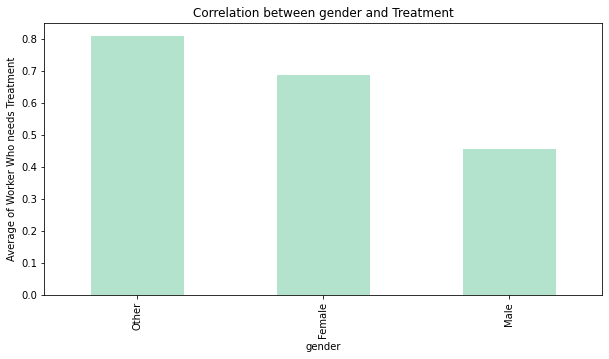

In [18]:
correlation_plot('gender');

> Based on gender, worker who have `other` as gender have sought treatment more often  

In [19]:
df['gender_'] = df['gender'].replace({
    'Male' : 1,
    'Female' : 2,
    'Other' : 3
})

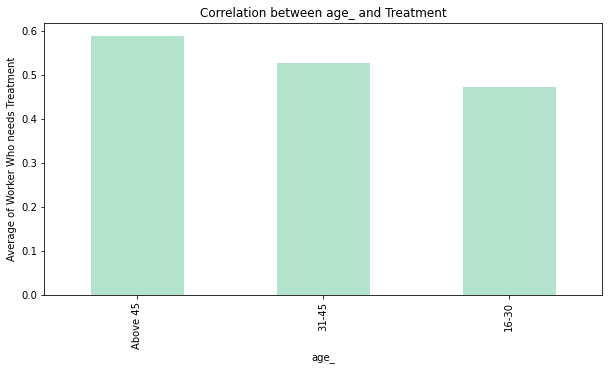

In [20]:
correlation_plot('age_')

> Based on age, worker who aged `above 45` have sought treatment more often  

In [21]:
df['age__'] = df['age_'].replace({
    '16-30' : 1,
    '31-45' : 2,
    'Above 45' : 3
})

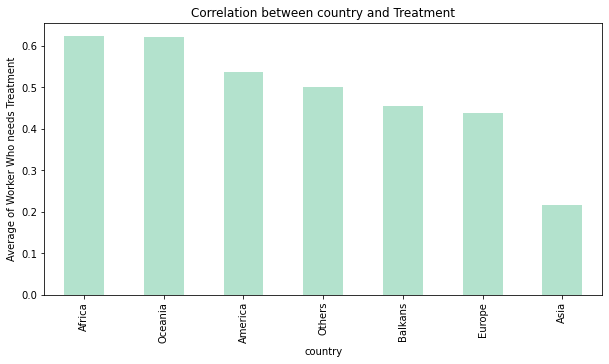

In [22]:
correlation_plot('country')

> Based on continent, worker who live in `Oceania` have sought treatment more often  

In [23]:
df['continent_'] = df['country'].replace({
    'Asia' : 1,
    'Europe' : 2,
    'Balkans' : 3,
    'Others' : 4,
    'America' : 5, 
    'Oceania' : 6,
    'Africa' : 7,
})

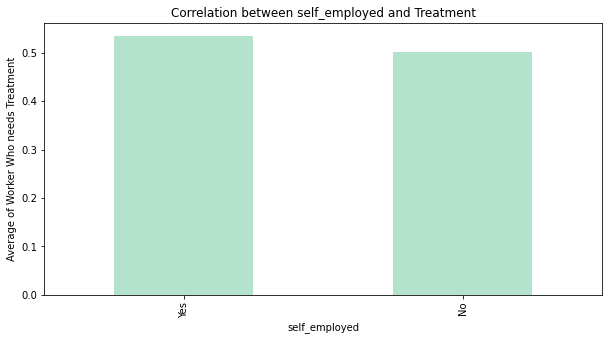

In [24]:
correlation_plot('self_employed')

> Question : Are you self-employed?

> Analyze : Based on self_employed, worker who is  `self employed` have sought treatment more often  

In [25]:
df['self_employed_'] = df['self_employed'].replace({
    'No' : 1,
    'Yes' : 2,
})

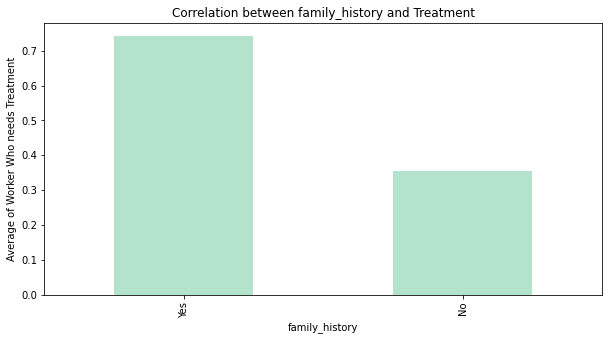

In [26]:
correlation_plot('family_history')

> Question : Do you have a family history of mental illness?

> Based on the family history, worker who have family history on medical condition have sought treatment more often. This is normal because they pay attention more to mental health

In [27]:
df['family_history_'] = df['family_history'].replace({
    'No' : 1,
    'Yes' : 2,
})

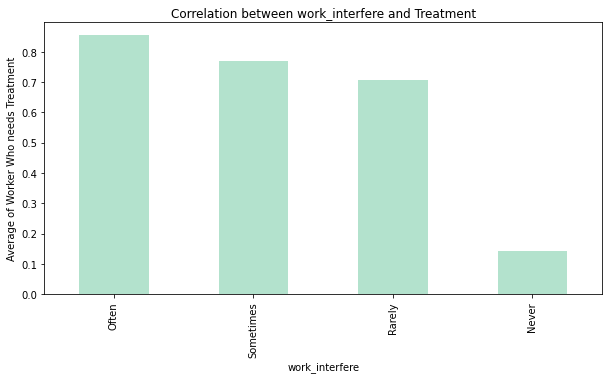

In [28]:
correlation_plot('work_interfere')

> Question : If you have a mental health condition, do you feel that it interferes with your work?

> Analyze : Employee who feel their mental health `often` interfere their work, have sought treatment more often  

In [29]:
df['work_interfere_'] = df['work_interfere'].replace({
    'Never' : 1,
    'Rarely' : 2,
    'Sometimes' : 3,
    'Often' : 4
})

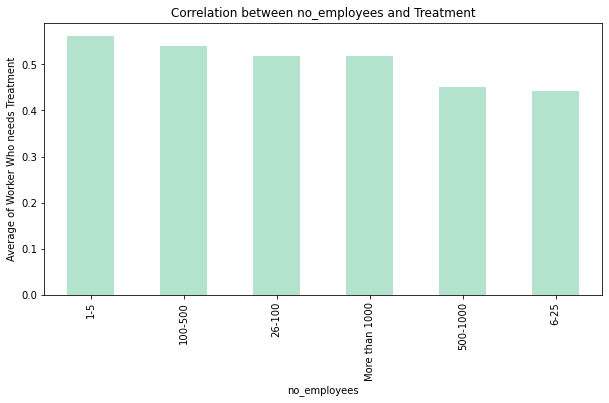

In [30]:
correlation_plot('no_employees')

> Question : If you have a mental health condition, do you feel that it interferes with your work?

> Analyze : i think there's no pattern between the number since it's abstract pattern between small company/large company

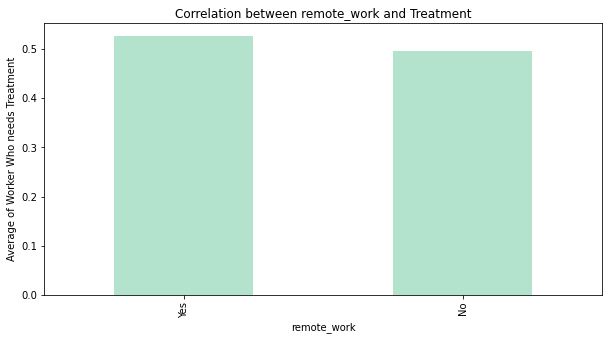

In [31]:
correlation_plot('remote_work')

> Question : Do you work remotely (outside of an office) at least 50% of the time?

> Analyze : Employee who work remotely have seek treatment more often.

In [32]:
df['remote_work_'] = df['remote_work'].replace({
    'No' : 1,
    'Yes' : 2,
})

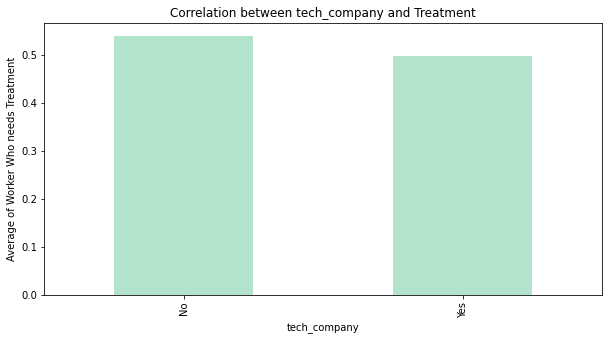

In [33]:
correlation_plot('tech_company')

> Question : Is your employer primarily a tech company/organization?

> ANalyze :  Worker who don't work at tech' company, did treatment more often

In [34]:
df['tech_company_'] = df['tech_company'].replace({
    'Yes' : 1,
    'No' : 2
})

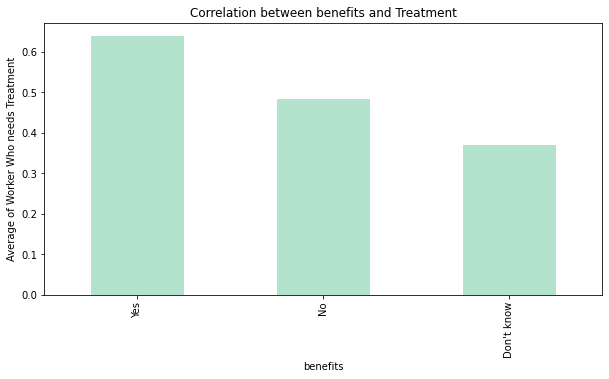

In [35]:
correlation_plot('benefits')

> Question : Does your employer provide mental health benefits?

> Analyze : When the company provide mental health benefits, the worker seek treatment more often

In [36]:
df['benefits_'] = df['benefits'].replace({
    "Don't know" : 1,
    'No' : 2,
    'Yes' : 3,
})

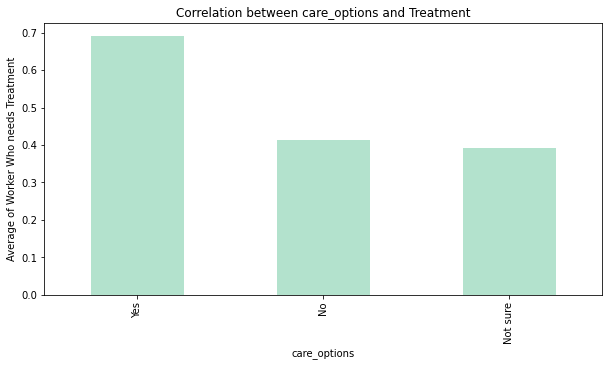

In [37]:
correlation_plot('care_options')

> Question : Do you know the options for mental health care your employer provides?

> Analyze : When the worker knows what are options for their mental health provided by company, they tend to seek for treatment

In [38]:
df['care_options_'] = df['care_options'].replace({
    "Not sure" : 1,
    'No' : 2,
    'Yes' : 3,
})

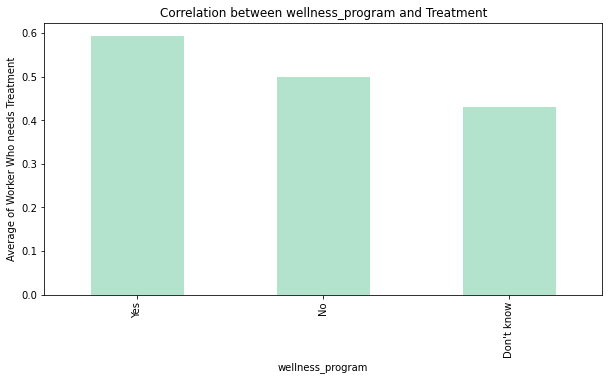

In [39]:
correlation_plot('wellness_program')

>Question : Do you know the options for mental health care your employer provides?

>Analyze :  When the company ever discussed mental health as their employee wellness program (yes). the worker tend to seek for treatment

In [40]:
df['wellness_program_'] = df['wellness_program'].replace({
    "Don't know" : 1,
    'No' : 2,
    'Yes' : 3,
})

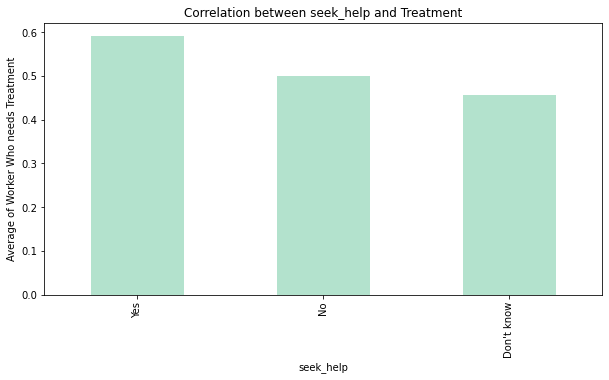

In [41]:
correlation_plot('seek_help')

In [42]:
df['seek_help_'] = df['seek_help'].replace({
    "Don't know" : 1,
    'No' : 2,
    'Yes' : 3,
})

> Question : Does your employer provide resources to learn more about mental health issues and how to seek help?

> Analyze : When the employer provide resource to learn mentalh health & how to seek help, the worker will likely have seek for treatment


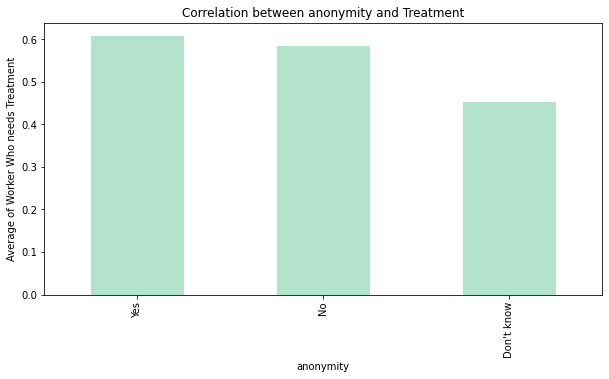

In [43]:
correlation_plot('anonymity')

> Question : Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

> Analyze : When the worker anonymity is safe (yes) then they have have done treatment more often

In [44]:
df['anonymity_'] = df['anonymity'].replace({
    "Don't know" : 1,
    'No' : 2,
    'Yes' : 3,
})

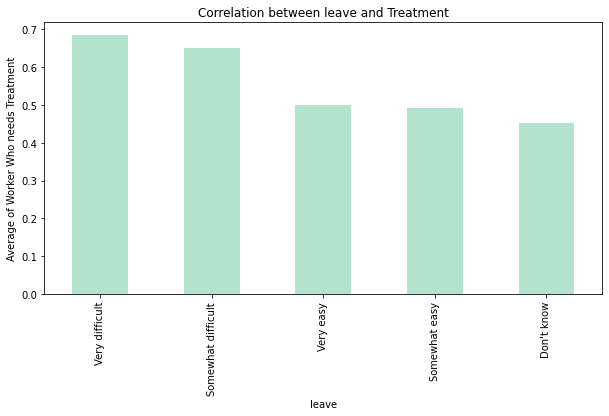

In [45]:
correlation_plot('leave')

> Question : How easy is it for you to take medical leave for a mental health condition?

> Analyze : those worker who have difficulty to take leave for mental health condition tends to seek treatment more often

In [46]:
df['leave_'] = df['leave'].replace({
    "Don't know" : 1,
    'Somewhat easy' : 2,
    'Very easy' : 3,
    'Somewhat difficult' : 4,
    'Very difficult' : 5
})

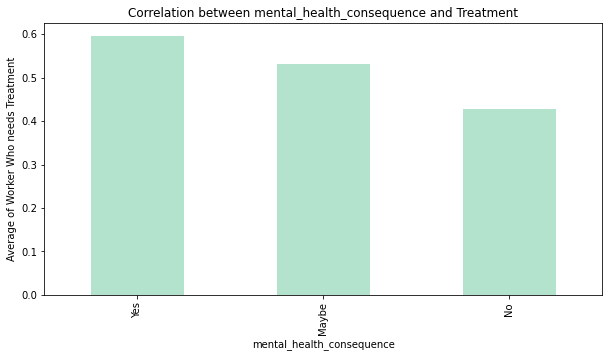

In [47]:
correlation_plot('mental_health_consequence')

> Question : Do you think that discussing a mental health issue with your employer would have negative consequences?

> Analuze : Those worker who don't trust their employer to talk about mental health tends to seek treatment.

In [48]:
df['mental_health_consequence_'] = df['mental_health_consequence'].replace({
    "No" : 1,
    'Maybe' : 2,
    'Yes' : 3,
})

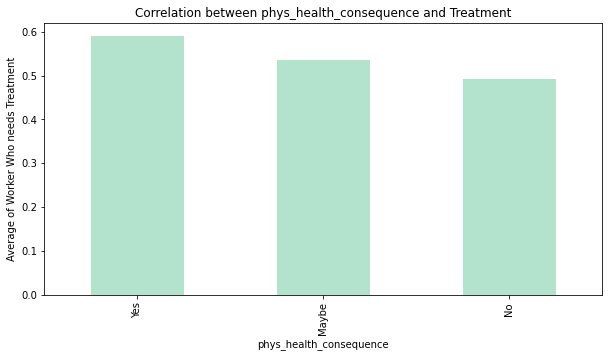

In [49]:
correlation_plot('phys_health_consequence')

> Question : Do you think that discussing a physical health issue with your employer would have negative consequences?

> Analyze : this results represents the same as meantal_health_consequences. Those worker who don't trust their employer to talk about mental health tends to seek treatment.

In [50]:
df['phys_health_consequence_'] = df['phys_health_consequence'].replace({
    "No" : 1,
    'Maybe' : 2,
    'Yes' : 3,
})

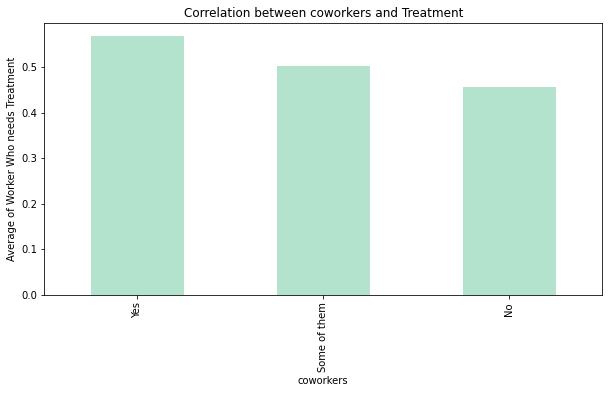

In [51]:
correlation_plot('coworkers')

> Question : Would you be willing to discuss a mental health issue with your coworkers?

> Analyze : When the worker trust their coworkers, they still want to sek treatment. 

In [52]:
df['coworkers_'] = df['coworkers'].replace({
    "No" : 1,
    'Some of them' : 2,
    'Yes' : 3,
})

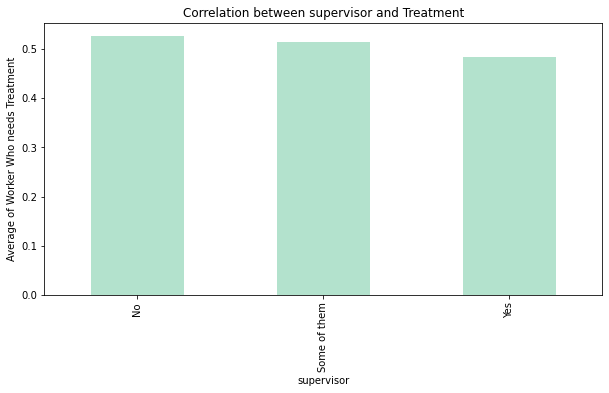

In [53]:
correlation_plot('supervisor')

> question : Would you be willing to discuss a mental health issue with your direct supervisor(s)?

> Analyze : When the worker don't trust their supervisor, they prefer to seek treatment

In [54]:
df['supervisor_'] = df['supervisor'].replace({
    "Yes" : 1,
    'Some of them' : 2,
    'No' : 3,
})

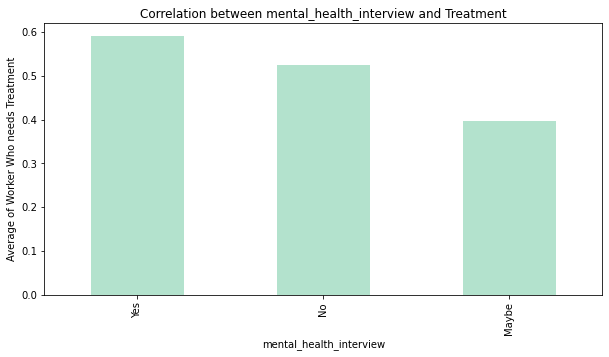

In [55]:
correlation_plot('mental_health_interview')

> Question : Would you bring up a mental health issue with a potential employer in an interview?

> Answer : When the worker choose to speak up about mental health with empoloyer during interview, they have done treatment more often.

In [56]:
df['mental_health_interview_'] = df['mental_health_interview'].replace({
    "Maybe" : 1,
    'No' : 2,
    'Yes' : 3,
})

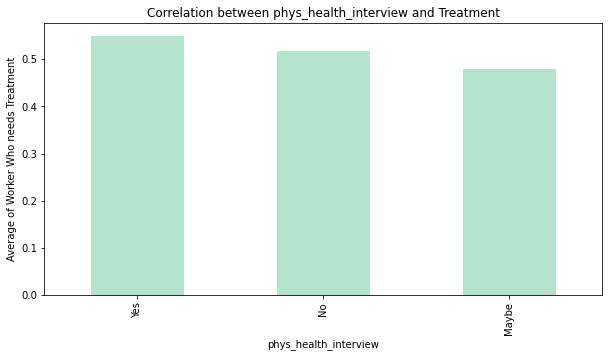

In [57]:
correlation_plot('phys_health_interview')

> Question :  Would you bring up a physical health issue with a potential employer in an interview?

> Answer : When the worker choose to speak up about physical health with empoloyer during interview, they have done treatment more often.

In [58]:
df['phys_health_interview_'] = df['phys_health_interview'].replace({
    "Maybe" : 1,
    'No' : 2,
    'Yes' : 3,
})

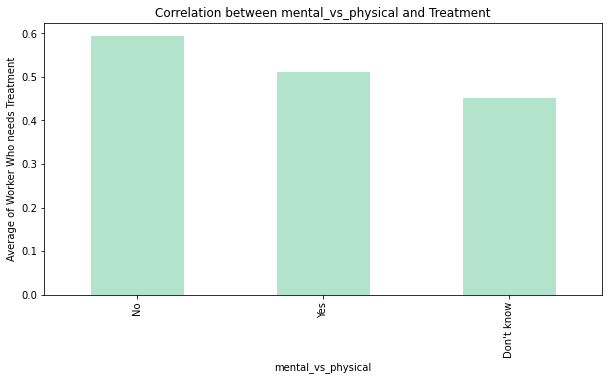

In [59]:
correlation_plot('mental_vs_physical')

> Question : Do you feel that your employer takes mental health as seriously as physical health?

> ANalyze : When the employer don't take mental health seriously, the worker will seek for treatments

In [60]:
df['mental_vs_physical_'] = df['mental_vs_physical'].replace({
    "Don't know" : 1,
    'Yes' : 2,
    'No' : 3,
})

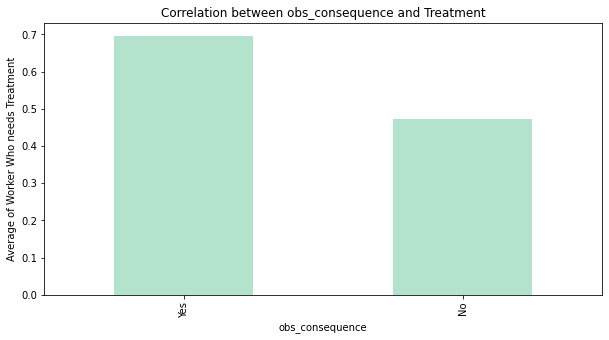

In [61]:
correlation_plot('obs_consequence')

> Question : Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

> Analyze : When the worker knows about `observed negative consequences`, they are people who have done treatment often

In [62]:
df['obs_consequence_'] = df['obs_consequence'].replace({
    "No" : 1,
    'Yes' : 2,
})

### Correlations With Targets

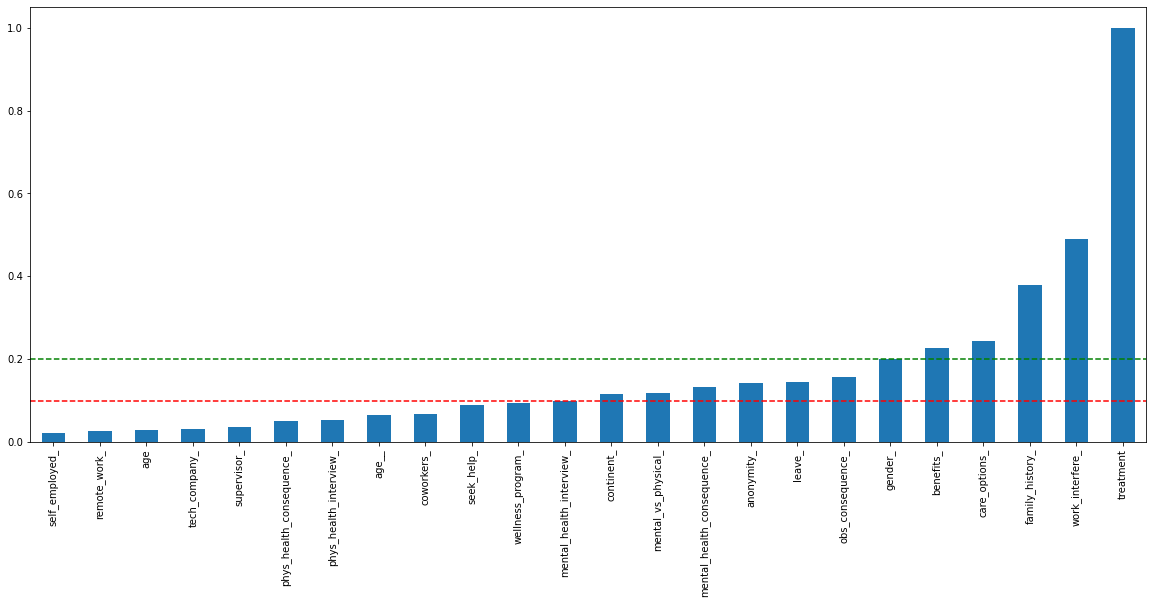

In [63]:
corr_score = df.corr()['treatment'].sort_values()
corr_score.plot(kind='bar', figsize=(20,8))
plt.axhline(y=0.1, color='r', ls='--')
plt.axhline(y=0.2, color='g', ls='--')

> Features that have high correlation (> 0.1) are continent, mental_health_consequence, anonymity, leave, obs_consequence, gender, benefits, care_options, family_history, and work_interfere

## EDA RESULT AND INSIGHT

Now, we need to predict whether our new employee/current employee need treatment or not. How do we predict that? We predict that by understanding their behaviour and their perspective towards our works.

When there's correlation between each feature to our target (treatment), then those feature are pretty much important for our prediction. In This case, those features are continent, mental_health_consequence, anonymity, leave, obs_consequence, gender, benefits, care_options, family_history, and work_interfere.

There are 2 perspective for this case: First, Employee's profile. Second, Company's profile.

1. Employee's Profile
- Continent = Those who came from Afrika might have high pressure in work
- Family History = Those employee with a history of mental illness in their family, pays attention more on mental health. They have higher possibilites of needing treatment
- Work Interfere = Employee who have mental illness issue and `Often` interfere their performance at work tends to need treatment for their mental condition
- Gender = Others/Undefined/Queer gender mostly had treatment before, this means if we have an employee with `Queer` as their gender, there's a big possibility that they need treatment.

> In Conclusions, those are employees we need to pay attention about their needs of treatments

2. Company's Profile
- Mental health consequence = When the employee can't trust their company, they'll choose to do treatments.
- Anonymity = If the employee anonymity is protected, then they're fine to do treatments.
- Leave = If the employee have difficulty in taking leave for their mental health, they're more likely in needing treatments. condition.
- Obs Consequence = When the worker knows about observed negative consequences, they are people who have done treatment often
- Benefits = Those employee did treatment because their company provide mental health benefits. 
- Care Options = Those employee who have options for their mental health provided by their company tends to do treatment for their mental health

> In conclusions, if the company `willing to treat their employee` then they have to make sure their company is safe enough to speak up about mental health. In example : Makesure the employee trust the company so they don't need to do treatments, or the company may give them an easy way to take a leave due to the employee's mental condition.



# Data Preprocessing

## Split Data

In [64]:
random_state=150
df_inf = df.sample(5, random_state=random_state) #5 for sample
df_train_test = df.drop(df_inf.index)

df_train_test = df_train_test.reset_index(drop=True)
df_inf = df_inf.reset_index(drop=True)

X = df_train_test.drop('treatment', axis=1)
y = df_train_test['treatment']

X_trainval, X_testval, y_trainval, y_testval = train_test_split(X, y, test_size=0.2, random_state=random_state) #20% for test set

## Outliers
I've stated before that this data have no outliers because all of this features are category

## Handle Missing Value

For all missing value will be imputed with the mode using Pipeline

In [65]:
X_trainval.age_.dropna(inplace=True)

## Feature Engineering

The feature i use here are feature with >0.1 correlation



In [66]:
feature = ['country', 'mental_health_consequence', 'anonymity', 
           'leave', 'obs_consequence', 'gender', 'benefits', 
           'care_options', 'family_history', 'work_interfere']

In [68]:
continent_ordinal = OrdinalEncoder(categories=[[ 'Asia' ,
    'Europe' ,
    'Balkans',
    'Others',
    'America', 
    'Oceania',
    'Africa'
]])
mental_ordinal = OrdinalEncoder(categories=[[
    "No",
    'Maybe',
    'Yes'
]])

anonymity_ordinal = OrdinalEncoder(categories=[[
    "Don't know",
    'No',
    'Yes'
]])

benefits_ordinal = OrdinalEncoder(categories=[[
    "Don't know",
    'No',
    'Yes'

]])
leave_ordinal = OrdinalEncoder(categories=[[
    "Don't know",
    'Somewhat easy',
    'Very easy',
    'Somewhat difficult',
    'Very difficult'
]])
obs_ordinal = OrdinalEncoder(categories=[[
    "No" ,
    'Yes'
]])

family_ordinal = OrdinalEncoder(categories=[[
    "No" ,
    'Yes'
]])
gender_ordinal = OrdinalEncoder(categories=[[
    'Male' ,
    'Female',
    'Other'
]])

care_ordinal = OrdinalEncoder(categories=[[
    "Not sure",
    'No',
    'Yes'
]])
work_interfere_ordinal = OrdinalEncoder(categories=[[
    'Never' ,
    'Rarely',
    'Sometimes' ,
    'Often' 
]])

In [69]:
cols = X_trainval.columns.tolist()

In [70]:
missing_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent'))])

prep_pipeline = ColumnTransformer([
    ('continent', Pipeline([
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('ordinal',continent_ordinal)
        ]), ['country'] ),
    ('mhc', Pipeline([
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('ordinal',mental_ordinal)
        ]), ['mental_health_consequence'] ),
    ('anon', Pipeline([
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('ordinal',anonymity_ordinal)
        ]), ['anonymity'] ),
    ('benefit',Pipeline([
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('ordinal',benefits_ordinal)
        ]) , ['benefits'] ),
    ('leave', Pipeline([
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('ordinal',leave_ordinal)
        ]) , ['leave'] ),
    ('obs', Pipeline([
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('ordinal',obs_ordinal)
        ]) , ['obs_consequence'] ),
    ('family', Pipeline([
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('ordinal',family_ordinal)
        ]) , ['family_history'] ),
    ('gender', Pipeline([
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('ordinal',gender_ordinal)
        ]) , ['gender'] ),
    ('care', Pipeline([
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('ordinal',care_ordinal)
        ]) , ['care_options'] ),
    ('wi',Pipeline([
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('ordinal',work_interfere_ordinal)
        ]) , ['work_interfere'] )
])

In [71]:
#create pipeline for 4 models
pipe_lr = Pipeline([
                     ('prep', prep_pipeline),
                     ('lr', LogisticRegression(random_state=random_state))
                     ])

pipe_rf = Pipeline([
                     ('prep', prep_pipeline),
                     ('rf', RandomForestClassifier(random_state=random_state))
                     ])

pipe_svm = Pipeline([
                     ('prep', prep_pipeline),
                     ('svm', SVC(max_iter=5_000,random_state=random_state)) #max_iter = 5000 agar proses fit tidak terlalu lama
                     ])
pipe_knn = Pipeline([
                     ('prep', prep_pipeline),
                     ('knn', KNeighborsClassifier())
                     ])

pipe_gb = Pipeline([
                     ('prep', prep_pipeline),
                     ('gb', GradientBoostingClassifier(random_state=random_state))
                     ])

In [72]:
#create pipeline for parameters each model
param_lr = {
    'lr__penalty' : [ 'l2', 'l1'],
    'lr__C' : [0.01, 0.1, 1],
    'lr__solver' : [ 'liblinear', 'saga']
}


param_svm = {
    'svm__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm__C': [0.01, 0.1, 1],
    'svm__degree': [2,3,5]
}

param_rf = {
    'rf__n_estimators' : [100,200],
    'rf__criterion' : ['gini', 'entropy'],
    'rf__max_depth': [5,10, None]
}

param_knn = {
    'knn__n_neighbors' : [3,5,8],
    'knn__weights' : ['uniform', 'distance'],
    'knn__p' : [1,2]
}

param_gb = {
    'gb__n_estimators' : [200,60, 40],
    'gb__learning_rate' : [0.1 , 0.05],
    'gb__min_samples_split' : [2,4],
    'gb__max_depth' : [5, 8,None]
}

# Model Training

In [73]:
pipe_lr.fit(X_trainval, y_trainval)
pipe_svm.fit(X_trainval, y_trainval)
pipe_rf.fit(X_trainval, y_trainval)
pipe_knn.fit(X_trainval, y_trainval)
pipe_gb.fit(X_trainval, y_trainval)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('continent',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Asia',
                                                                                               'Europe',
                                                                                               'Balkans',
                                                                                               'Others',
                                                                                               'America',
                                                                                               'Oceania',
                 

# Model Evaluation

I'm using `accuracy` as my score because my targets is balance enough. Note to mention is our datasets is small, we can;t use too much cv. Therefore i'll only use 3 cv

## Cross Val Score

In [74]:
score_lr = cross_val_score(pipe_lr, X_trainval, y_trainval, cv=3, scoring="f1")
score_svm = cross_val_score(pipe_svm, X_trainval, y_trainval, cv=3,scoring="f1")
score_knn = cross_val_score(pipe_knn, X_trainval, y_trainval, cv=3,scoring="f1")
score_rf = cross_val_score(pipe_rf, X_trainval, y_trainval, cv=3,scoring="f1")
score_gb = cross_val_score(pipe_gb, X_trainval, y_trainval, cv=3,scoring="f1")

In [75]:
acc_mean_train = [np.mean(score_lr), np.mean(score_svm), np.mean(score_rf), np.mean(score_knn), np.mean(score_gb)]
acc_std_train = [np.std(score_lr), np.std(score_svm), np.std(score_rf), np.std(score_knn), np.std(score_gb)]

In [76]:
models = ['Logisstic Regression', 'SVM','Random Forest','KNN', 'GradientBoosting']

In [77]:
#membuat dataframe untuk cross validation 
cv_train = pd.DataFrame({'Models' : models, 'Mean of Accuracy Train' : acc_mean_train, 'Std of Accuracy Train': acc_std_train})
cv_train.sort_values(by='Mean of Accuracy Train', ascending=False).reset_index(drop=True)

,Models,Mean of Accuracy Train,Std of Accuracy Train
0,GradientBoosting,0.742279,0.020512
1,Logisstic Regression,0.734544,0.015675
2,SVM,0.734530,0.010660
3,Random Forest,0.726540,0.006517
4,KNN,0.674961,0.017345


## GridSearchCV

In [78]:
grid_gb = GridSearchCV(pipe_gb, param_gb, cv=3, verbose=True, scoring="f1").fit(X_trainval, y_trainval)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [79]:
print('Best Parameters for Gradient Boosting Model\n',grid_gb.best_params_)

Best Parameters for Gradient Boosting Model
 {'gb__learning_rate': 0.05, 'gb__max_depth': 5, 'gb__min_samples_split': 4, 'gb__n_estimators': 40}


In [80]:
best_gb = grid_gb.best_estimator_

In [92]:
best_gb

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('continent',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Asia',
                                                                                               'Europe',
                                                                                               'Balkans',
                                                                                               'Others',
                                                                                               'America',
                                                                                               'Oceania',
                 

In [82]:
y_pred_train_gb = best_gb.predict(X_trainval)
y_pred_test_gb = best_gb.predict(X_testval)

## Evaluate

In [83]:
print('Classification Report Gradient Boosting Train set\n', classification_report(y_trainval, y_pred_train_gb))
print('\nClassification Report Gradient Boosting Test set\n', classification_report(y_testval, y_pred_test_gb))

Classification Report Gradient Boosting Train set
               precision    recall  f1-score   support

           0       0.81      0.76      0.79       493
           1       0.78      0.83      0.80       510

    accuracy                           0.80      1003
   macro avg       0.80      0.80      0.80      1003
weighted avg       0.80      0.80      0.80      1003


Classification Report Gradient Boosting Test set
               precision    recall  f1-score   support

           0       0.80      0.70      0.74       128
           1       0.72      0.82      0.77       123

    accuracy                           0.76       251
   macro avg       0.76      0.76      0.76       251
weighted avg       0.76      0.76      0.76       251



Text(0.5, 1.0, 'Confusion Matrix Test Set')

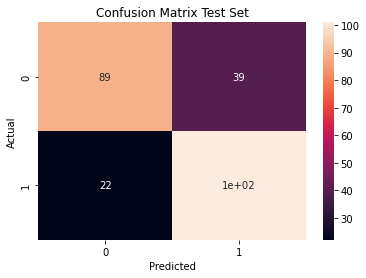

In [84]:
confusion_mat = confusion_matrix(y_testval, y_pred_test_gb)
sns.heatmap(confusion_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Test Set')

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


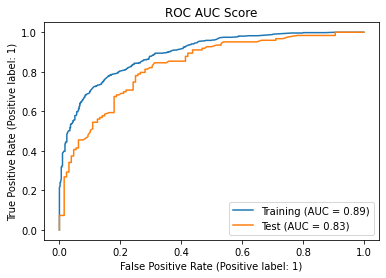

In [85]:
fig, ax = plt.subplots();
plot_roc_curve(best_gb, X_trainval, y_trainval, ax=ax, name='Training');
plot_roc_curve(best_gb, X_testval, y_testval, ax=ax, name='Test');
plt.title('ROC AUC Score');

> Classification Report :

>> Looking at f1 score from classification report, Gradient Boost resulting overfit on data train. I did try lots of changing in GradientBoost's parameters and the classification reports above is the best since it results in higher score yet not too overfit. Our target's data is balance, therefore this model have no difficulty in distinguish the class

> Confussion Matrix :

>> In testset, GradientBoost predicted 89+100 = 189 correct datas out of  250 data (75%)

> ROC AUC

>> Score for AUC GradientBoost Model resulting > 80 therefore this model is better than the baseline, however this still overfit

# Model Saving

In [ ]:
import pickle
with open ("pipe.pkl", "wb") as f :
    pickle.dump(best_gb, f)

# Model Inference

In [86]:
df_inf1 = df_inf.drop('treatment', axis=1)
df_inf2 = df_inf['treatment']

In [87]:
df_inf2 = pd.DataFrame(df_inf2)

In [88]:
inf_pred_lr = best_gb.predict(df_inf1)
inf_pred_lr_df = pd.DataFrame(inf_pred_lr, columns = ['predicted_lr'])

In [93]:
inf_pred_lr

array([0, 0, 1, 1, 1])

In [89]:
pd.concat([df_inf1,inf_pred_lr_df], axis=1)

,timestamp,age,gender,country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_,gender_,age__,continent_,self_employed_,family_history_,work_interfere_,remote_work_,tech_company_,benefits_,care_options_,wellness_program_,seek_help_,anonymity_,leave_,mental_health_consequence_,phys_health_consequence_,coworkers_,supervisor_,mental_health_interview_,phys_health_interview_,mental_vs_physical_,obs_consequence_,predicted_lr
0,2014-08-27 11:36:24,41,Male,America,IA,No,No,Never,More than 1000,No,No,Don't know,No,No,Don't know,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No,NaN,31-45,1,2.0,5,1.0,1,1.0,1,2,1,2,2,1,1,1,2,1,1,3,2,3,1,1,0
1,2014-08-28 15:01:46,43,Male,America,MA,No,No,NaN,More than 1000,No,Yes,Yes,No,Yes,Yes,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,NaN,31-45,1,2.0,5,1.0,1,NaN,1,1,3,2,3,3,1,1,1,1,2,1,2,1,1,1,0
2,2014-08-27 15:05:00,32,Male,America,MI,No,Yes,Rarely,More than 1000,No,No,Yes,Yes,Yes,Yes,Yes,Don't know,No,No,Some of them,Yes,No,Yes,Yes,No,NaN,31-45,1,2.0,5,1.0,2,2.0,1,2,3,3,3,3,3,1,1,1,2,1,2,3,2,1,1
3,2014-08-27 15:38:07,24,Female,America,NY,No,Yes,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Very easy,Yes,No,No,Some of them,No,Yes,Yes,No,NaN,16-30,2,1.0,5,1.0,2,2.0,1,1,2,2,2,2,1,3,3,1,1,2,2,3,2,1,1
4,2014-08-27 14:11:52,26,Female,America,WA,No,Yes,Rarely,More than 1000,No,Yes,Yes,Not sure,Don't know,Don't know,Don't know,Don't know,Maybe,No,Some of them,Some of them,No,No,Don't know,No,NaN,16-30,2,1.0,5,1.0,2,2.0,1,1,3,1,1,1,1,1,2,1,2,2,2,2,1,1,1


# Conclusion

## Overall Data
The data is balance enough for the target's classes. Yet this data is pretty much `messy` for the Gender Column, and country (not balance between continent) and it might be a problem if we encounter new data in test set that haven't been learned in train data. There are some missing value and it's MCAR, no pattern to detect. Luckily this data have no outliers. The feature I used for this models are features with correlation >0.1 to the targets.

## Model Result
To check which model are the best further, use cross_val_score scoring f1 with 3x. .
The results for those models I use are :

GradientBoost = 0.74
LogisticRegression = 0.73
SVM = 0.73
Random Forest = 0.72
KNN = 0.67


## Best Model
The highest f1 score from cross_val_score is GradientBoost. After tuned with it's best parameters, the data resulting in 80 scores for f1 (increase from 74 to 80) even tho the model is overfit.

Tunning parameters with GridSearchCV with 2fold resulting hyperparameter :

- learning_rate': 0.05, 
- max_depth': 5, 
- min_samples_split': 4, 
- n_estimators': 40

## Slight Insight
All employee might have a condition where they don't feel `fine` with the mental health, in this case there are only 3 factors that caused them might seek Treatment (Age, Continent, and Family History). The rest are depends on the company. Based on this EDA, it'd be better for comapny to create a conducive and supportive env for their employee so they don't have to take treatment because they feel `okay` with their company.